___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,PowerTransformer,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier

# Modelling Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [5]:
data = pd.read_csv("HR_Dataset.csv")
df = data.copy()
df.sample(7)

satisfaction_level  last_evaluation  number_project  \
161                 0.90             0.98               5   
8282                0.78             0.64               3   
3691                0.79             0.93               5   
8076                0.78             0.83               4   
6547                0.15             0.78               5   
9006                0.85             0.99               4   
7752                0.13             0.74               6   

      average_montly_hours  time_spend_company  Work_accident  left  \
161                    243                   6              0     1   
8282                   169                   2              1     0   
3691                   160                   4              1     0   
8076                   158                   3              0     0   
6547                   255                   3              0     0   
9006                   233                   2              0     0   
7752                   132                   4              1     0   

      promotion_last_5years Departments   salary  
161                       0    marketing     low  
8282                      0    technical  medium  
3691                      0   accounting  medium  
8076                      0           IT    high  
6547                      0           IT    high  
9006                      0    marketing    high  
7752                      0    technical  medium

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [8]:
df.skew().sort_values(ascending=False)

promotion_last_5years    6.636968
Work_accident            2.021149
time_spend_company       1.853319
left                     1.230043
number_project           0.337706
average_montly_hours     0.052842
last_evaluation         -0.026622
satisfaction_level      -0.476360
dtype: float64

In [9]:
df.duplicated().sum()

3008

In [10]:
df[df.duplicated()][(df[df.duplicated()]["average_montly_hours"] == 139) & (df[df.duplicated()]["number_project"] == 2) & (df[df.duplicated()]["last_evaluation"] == 0.57)
   & (df[df.duplicated()]["satisfaction_level"] == 0.46)]
    

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
12023                0.46             0.57               2   
12396                0.46             0.57               2   
14234                0.46             0.57               2   
14607                0.46             0.57               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
396                     139                   3              0     1   
12023                   139                   3              0     1   
12396                   139                   3              0     1   
14234                   139                   3              0     1   
14607                   139                   3              0     1   

       promotion_last_5years Departments  salary  
396                        0        sales    low  
12023                      0        sales    low  
12396                      0        sales    low  
14234                      0        sales    low  
14607                      0        sales    low

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [14]:
df.rename(columns={'Departments ':"Departments"},inplace=True)

In [15]:
cat_col = df.drop(['satisfaction_level',"last_evaluation","number_project","average_montly_hours","time_spend_company","left"], axis=1).columns
num_col = df.drop(columns=cat_col).drop(columns="left").columns

In [16]:
cat_col

Index(['Work_accident', 'promotion_last_5years', 'Departments', 'salary'], dtype='object')

In [17]:
num_col

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')

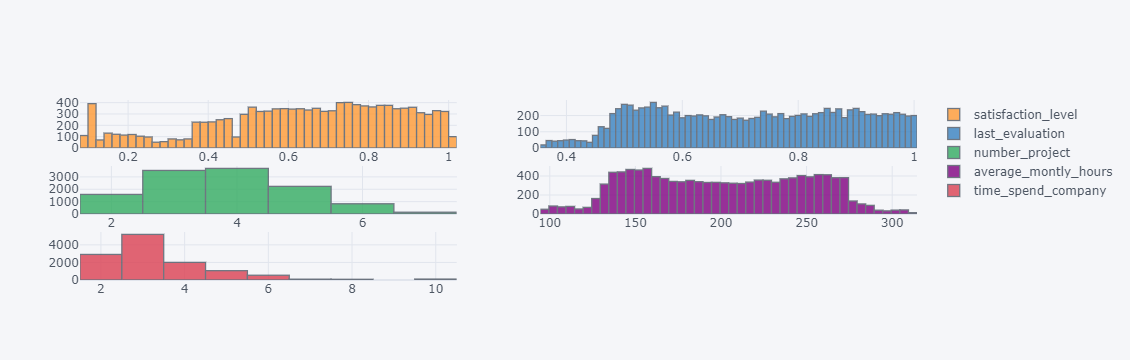

In [18]:
df[num_col].iplot(kind = "hist",subplots = True)

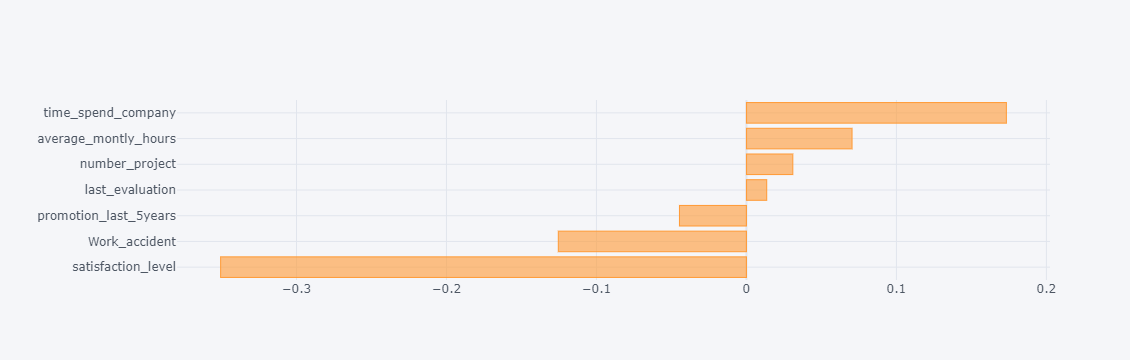

In [19]:
df.corr()["left"].drop(index="left").sort_values().iplot(kind="barh")

In [20]:
df[num_col].skew()

satisfaction_level     -0.538702
last_evaluation        -0.031686
number_project          0.332152
average_montly_hours    0.027208
time_spend_company      1.816577
dtype: float64

In [21]:
df.time_spend_company.describe()

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [22]:
len(df[df.time_spend_company == 10])/ len(df.time_spend_company)*100

0.8923359186056209

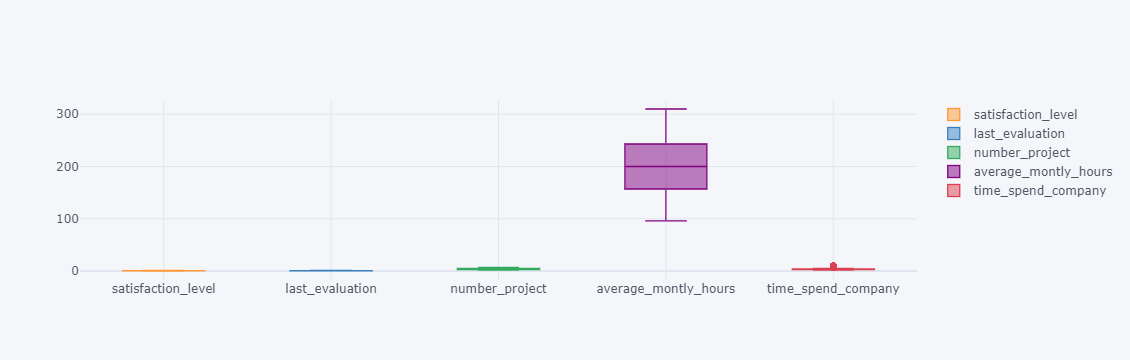

In [23]:
df[num_col].iplot("box",boxpoints = "outliers")

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

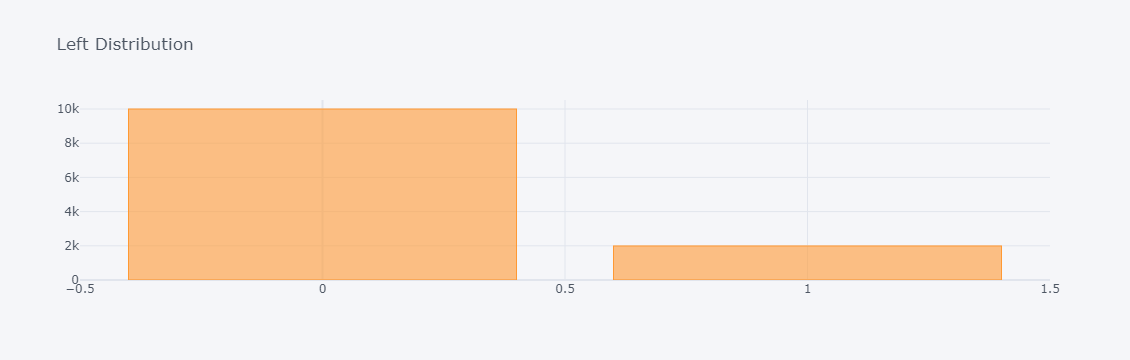

None


In [24]:
print(df.left.value_counts().iplot(kind="bar", title = 'Left Distribution'));

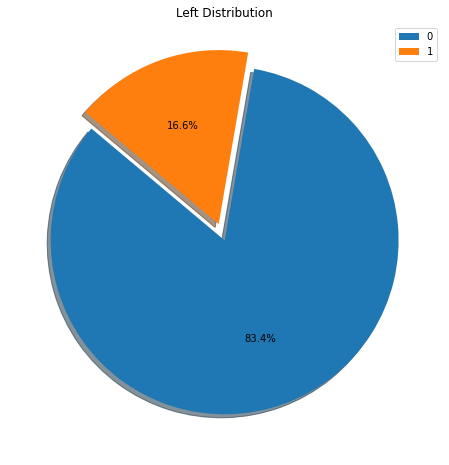

In [25]:
plt.figure(figsize=(8,8))

explode = [0,0.1]
plt.pie(df['left'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['0','1'])
plt.title('Left Distribution')
plt.axis('off');

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

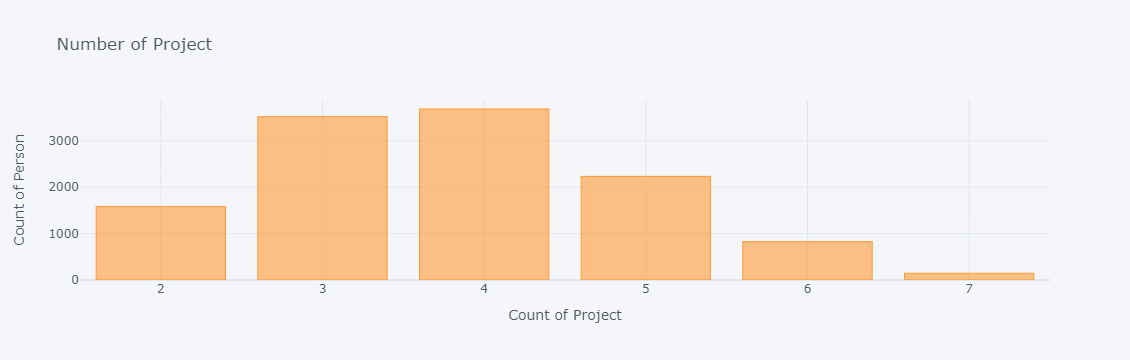

In [26]:
df.number_project.value_counts().iplot(kind = "bar",title = "Number of Project",yTitle = "Count of Person",xTitle = "Count of Project")

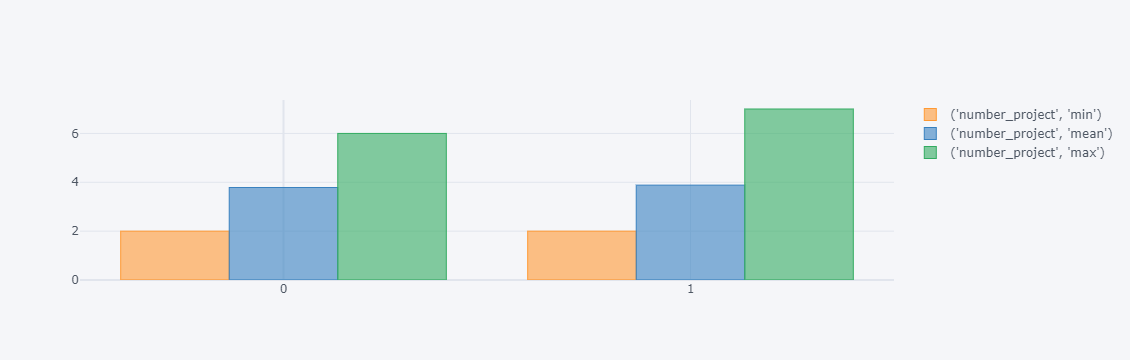

In [27]:
df.groupby("left")[["number_project"]].agg(["min","mean",max]).iplot("bar")

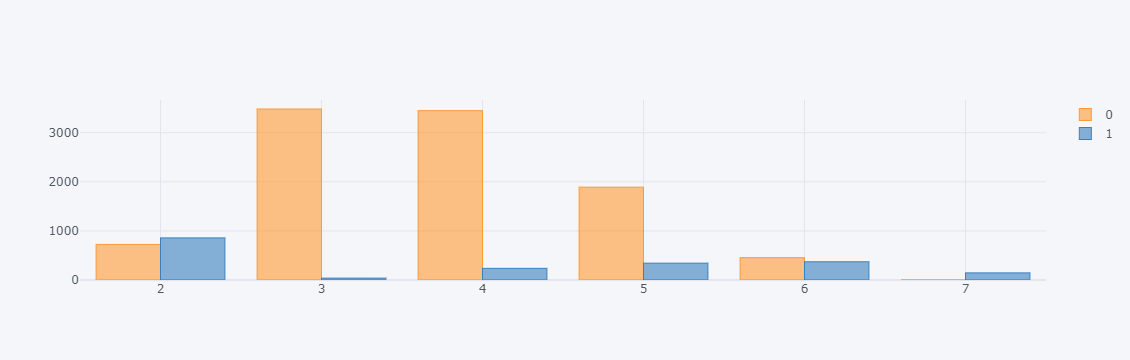

In [28]:
pd.crosstab(df.number_project,df.left).iplot("bar")

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


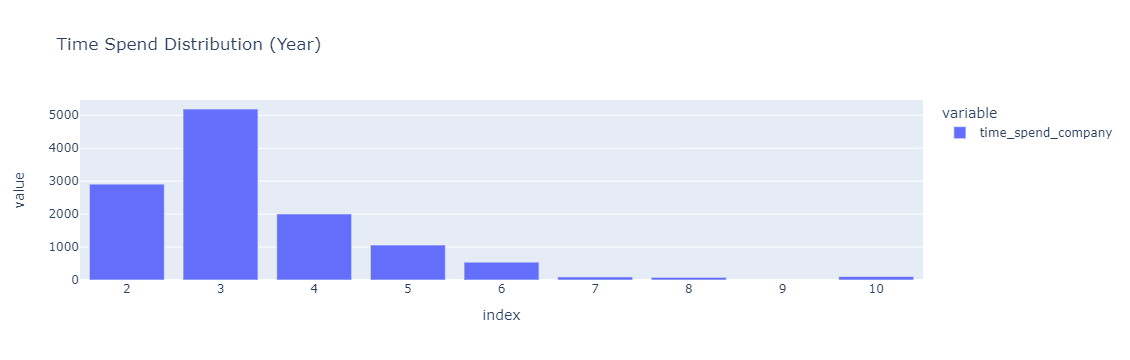

In [29]:
px.bar(df.time_spend_company.value_counts(),title= "Time Spend Distribution (Year)")

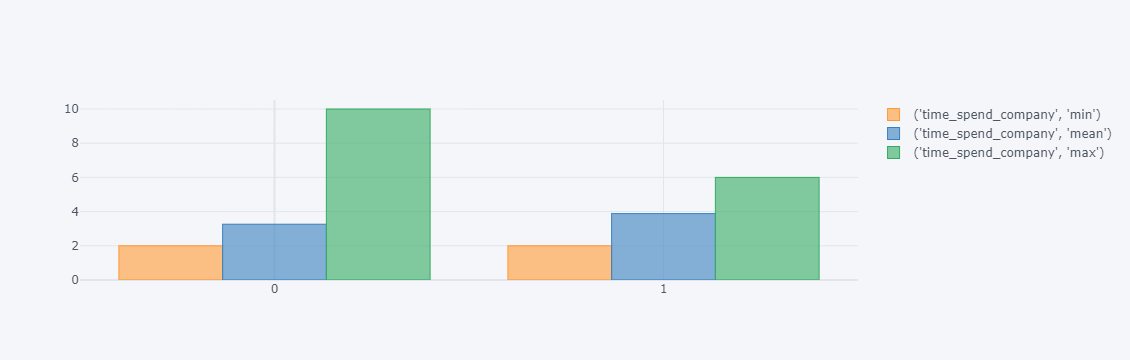

In [30]:
df.groupby("left")[["time_spend_company"]].agg(["min","mean",max]).iplot("bar")

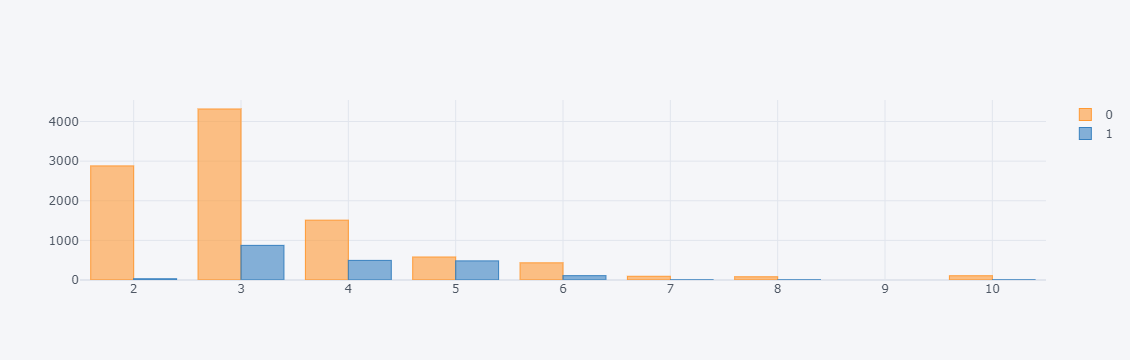

In [31]:
pd.crosstab(df.time_spend_company,df.left).iplot("bar")

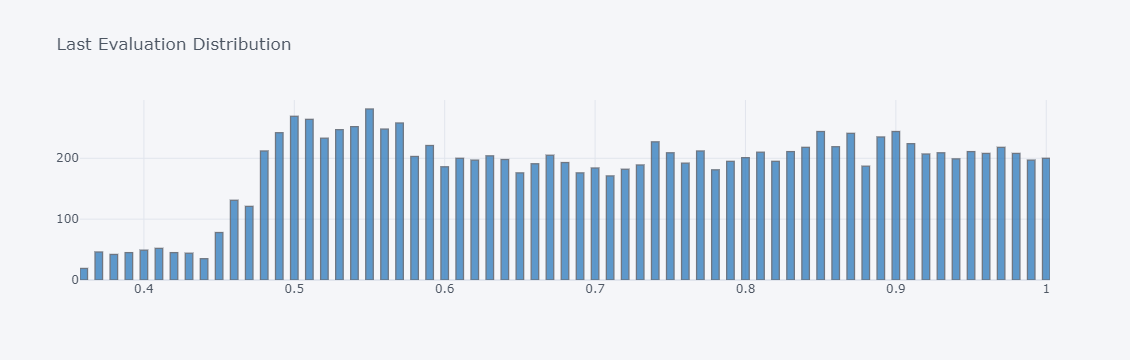

In [32]:
df.last_evaluation.iplot(kind = "hist",bins = 300, colors = "blue",title = "Last Evaluation Distribution")

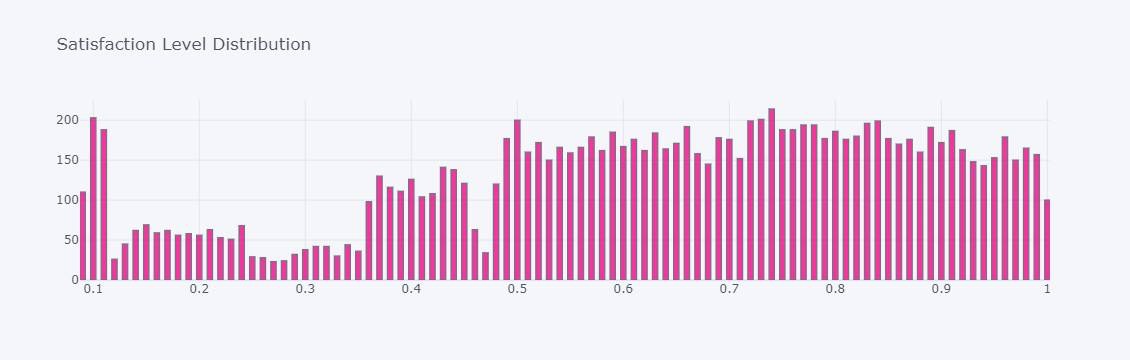

In [33]:
df.satisfaction_level.iplot(kind = "hist",bins = 300, colors = "pink",title = "Satisfaction Level Distribution")

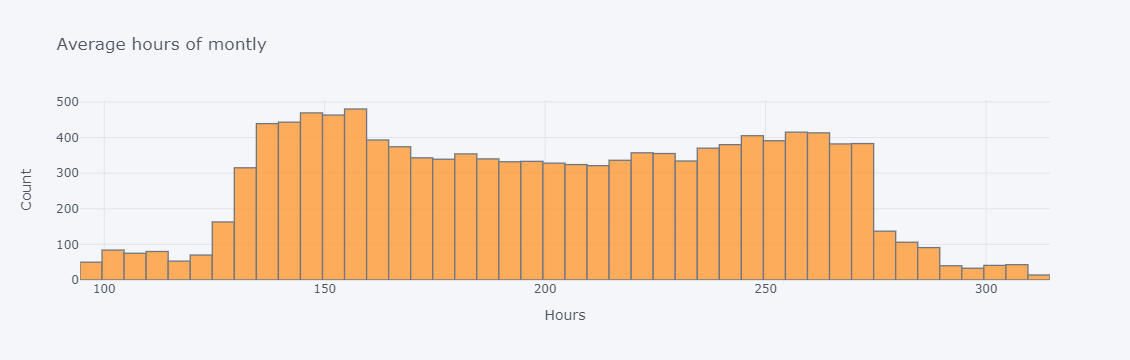

In [34]:
df.average_montly_hours.iplot(kind = "hist",title = "Average hours of montly", xTitle = "Hours",yTitle = "Count")

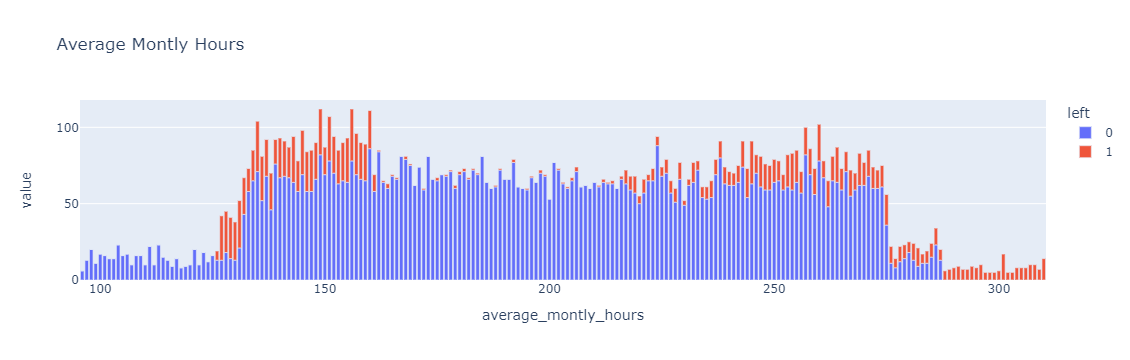

In [35]:
px.bar(pd.crosstab(df.average_montly_hours,df.left),color="left",title = "Average Montly Hours")

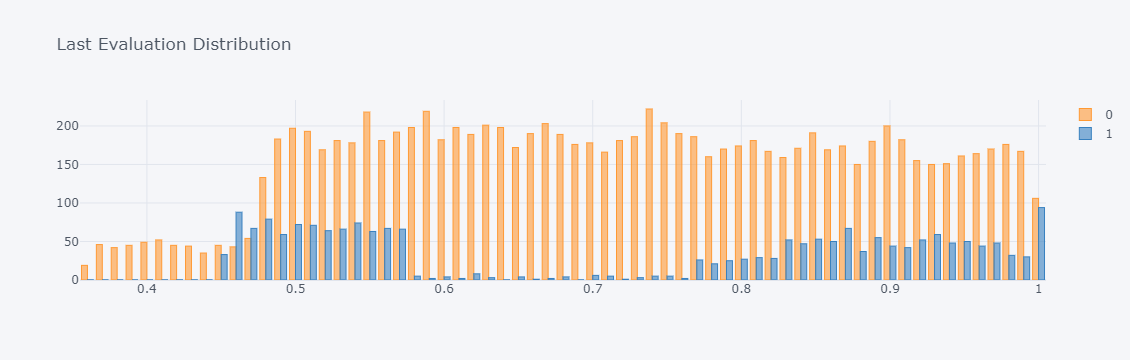

In [36]:
pd.crosstab(df.last_evaluation,df.left).iplot("bar",title = "Last Evaluation Distribution")

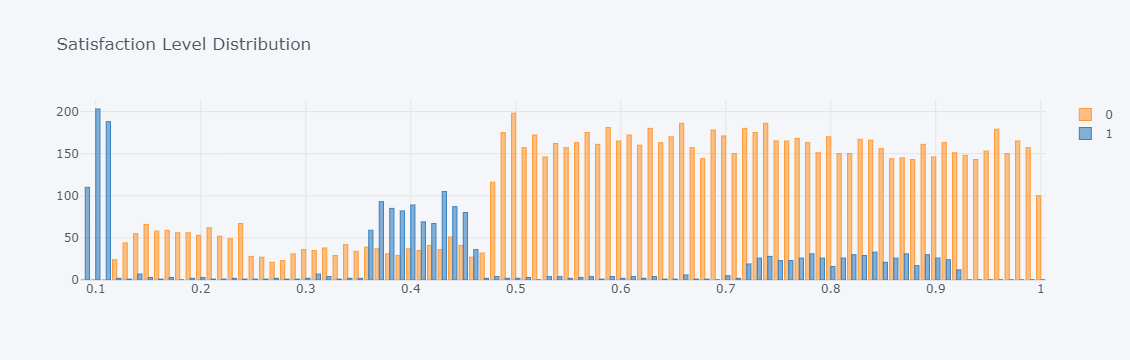

In [37]:
pd.crosstab(df.satisfaction_level,df.left).iplot("bar",title = "Satisfaction Level Distribution")

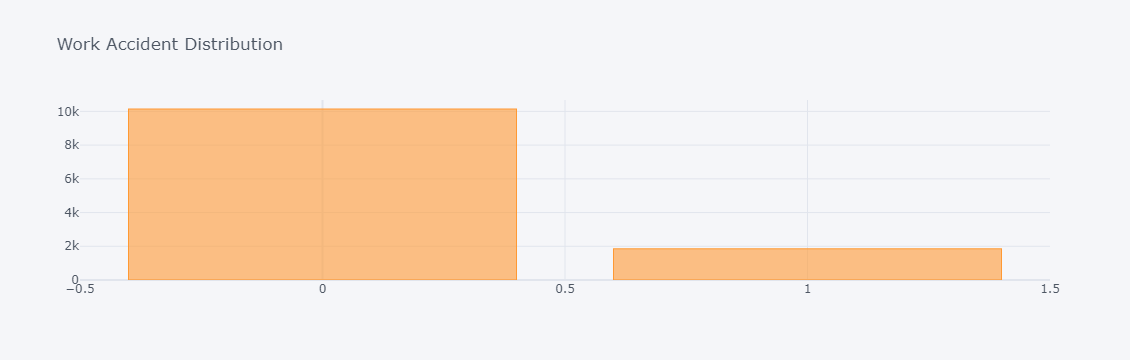

In [38]:
df.groupby("Work_accident")["left"].count().iplot("bar",title = "Work Accident Distribution");

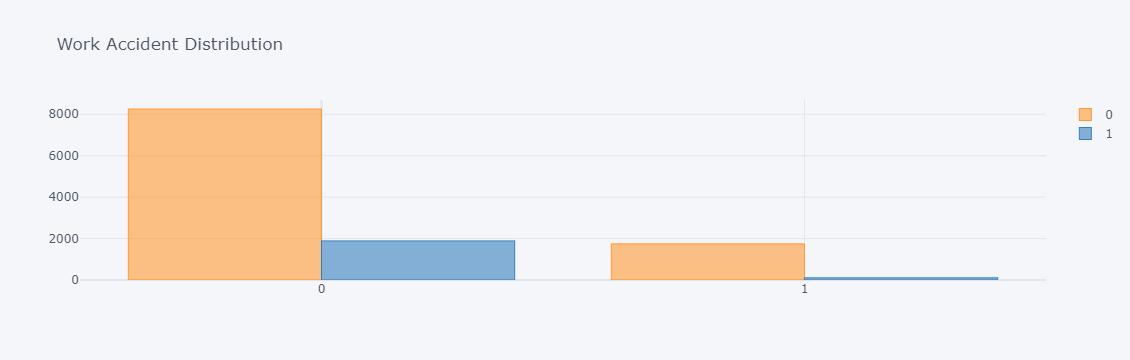

In [39]:
pd.crosstab(df.Work_accident,df.left).iplot("bar",title = "Work Accident Distribution")

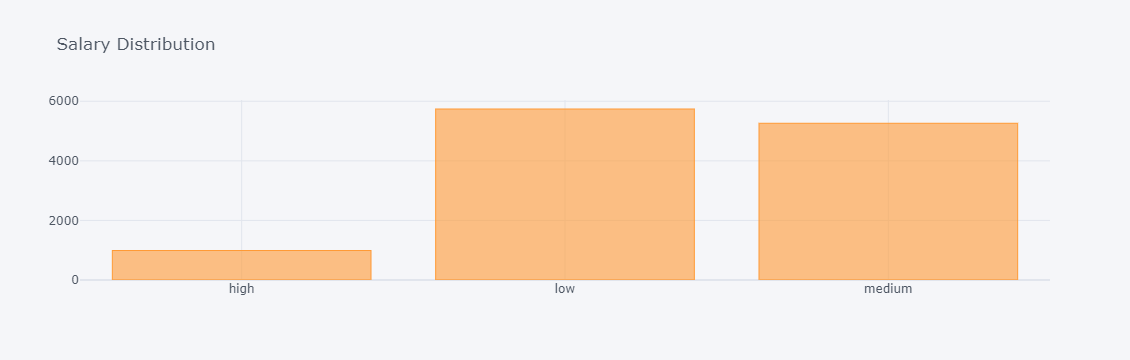

In [40]:
df.groupby("salary")["left"].count().iplot("bar",title = "Salary Distribution")

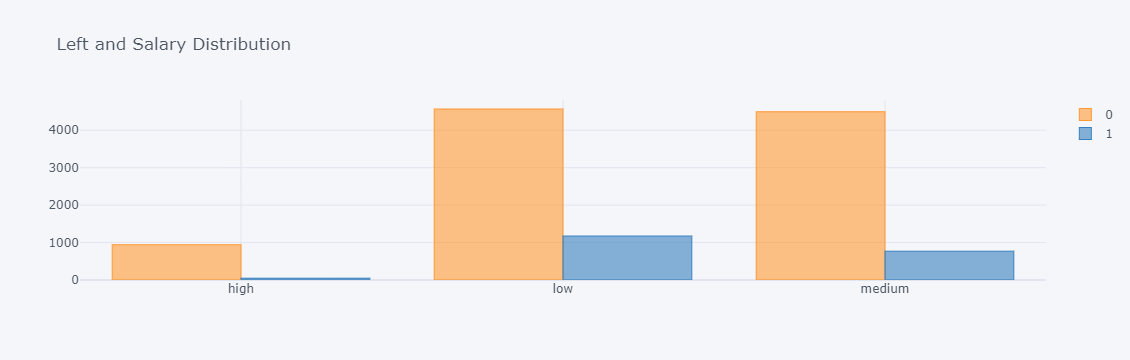

In [41]:
pd.crosstab(df.salary,df.left).iplot(kind = "bar", title = "Left and Salary Distribution")

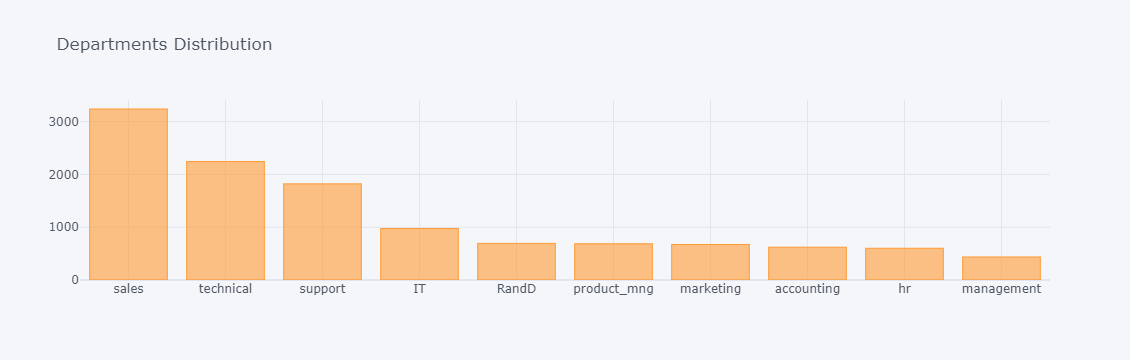

In [42]:
df.Departments.value_counts().iplot(kind = "bar" ,title = "Departments Distribution")

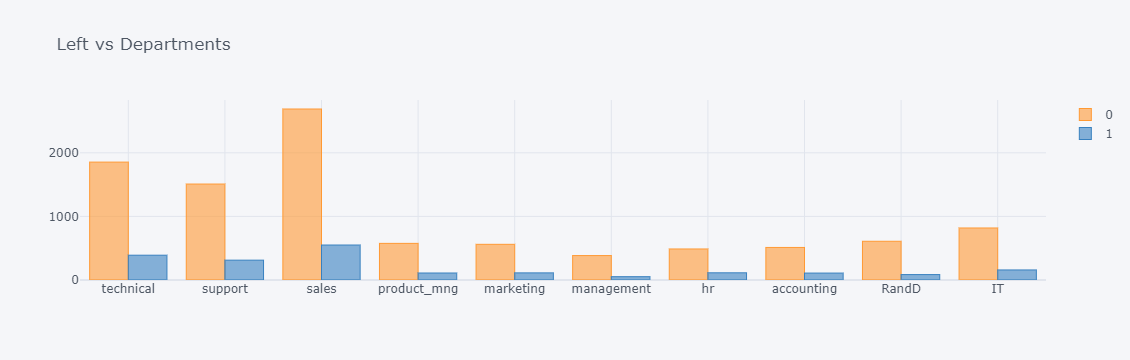

In [43]:
pd.crosstab(df.Departments,df.left).sort_values(by = "Departments",ascending=False).iplot(kind = "bar",title = "Left vs Departments")

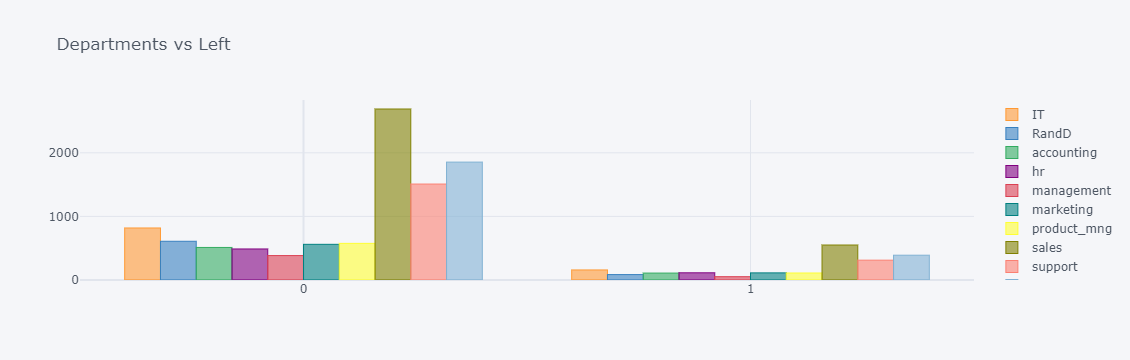

In [44]:
pd.crosstab(df.left,df.Departments).sort_values(by = "left",ascending=True).iplot("bar", title = "Departments vs Left")

In [45]:
sales_dep = df[df.Departments == "sales"]
sales_dep

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11981                0.49             0.89               4   
11982                0.73             0.67               2   
11983                0.67             0.49               5   
11984                0.52             0.61               4   
11985                0.72             0.64               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11981                   201                   8              0     0   
11982                   139                   8              0     0   
11983                   241                   8              0     0   
11984                   187                   4              1     0   
11985                   192                   3              0     0   

       promotion_last_5years Departments  salary  
0                          0       sales     low  
1                          0       sales  medium  
2                          0       sales  medium  
3                          0       sales     low  
4                          0       sales     low  
...                      ...         ...     ...  
11981                      0       sales  medium  
11982                      0       sales  medium  
11983                      0       sales  medium  
11984                      0       sales  medium  
11985                      0       sales  medium  

[3239 rows x 10 columns]

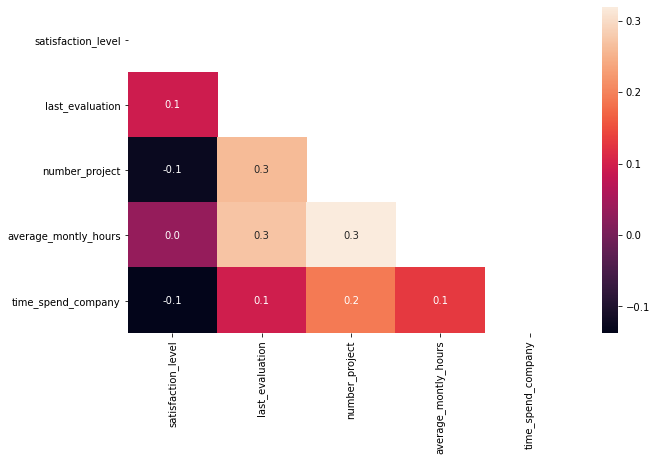

In [46]:
sns.heatmap(sales_dep[num_col].corr(),annot=True,mask =  np.triu(sales_dep[num_col].corr()),fmt= ".1f");

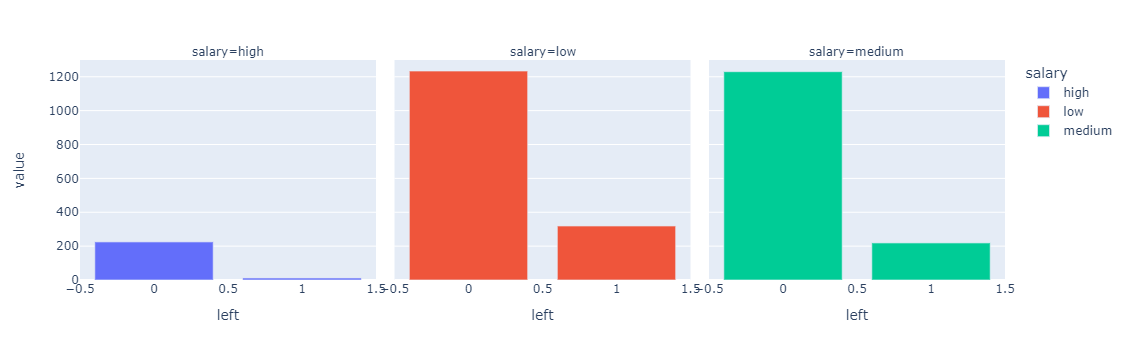

In [47]:
px.bar(pd.crosstab(sales_dep["left"],sales_dep["salary"]),facet_col="salary")

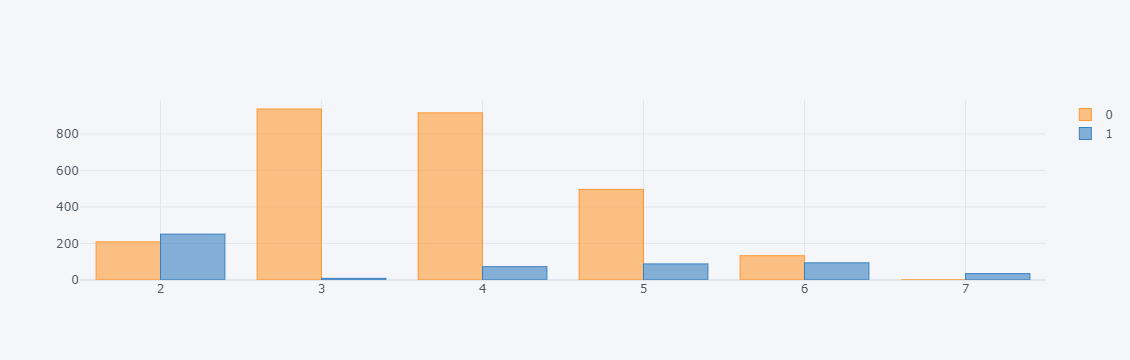

In [48]:
pd.crosstab(sales_dep.number_project,sales_dep.left).iplot("bar")

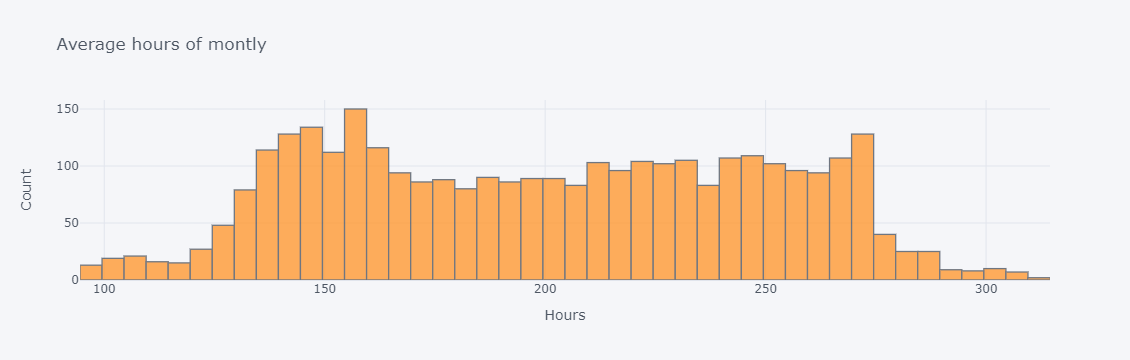

In [49]:
sales_dep.average_montly_hours.iplot(kind = "hist",title = "Average hours of montly", xTitle = "Hours",yTitle = "Count")

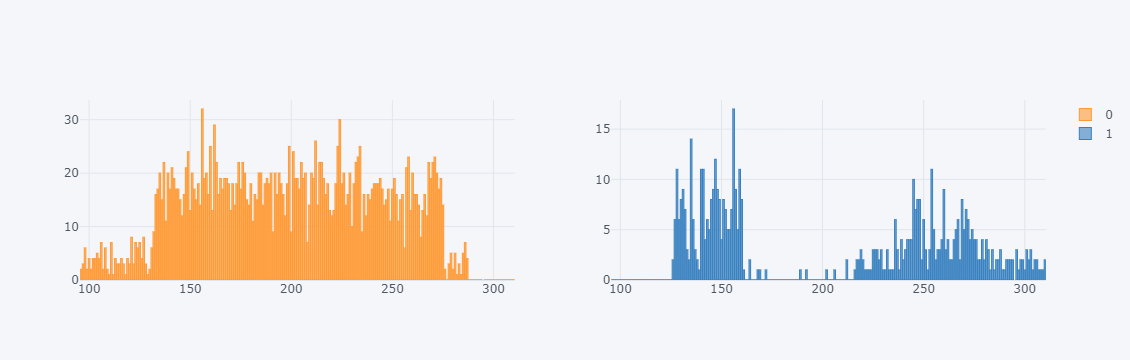

In [50]:
pd.crosstab(sales_dep.average_montly_hours,sales_dep["left"]).iplot("bar",subplots =True)

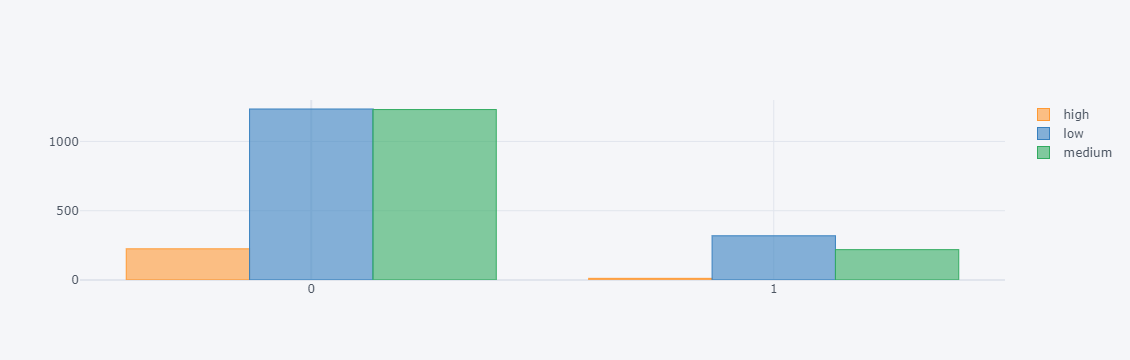

In [51]:
(pd.crosstab(sales_dep["left"],sales_dep["salary"])).iplot("bar")

In [52]:
sales_dep[sales_dep.promotion_last_5years == 1].salary.value_counts()

medium    40
high       9
low        9
Name: salary, dtype: int64

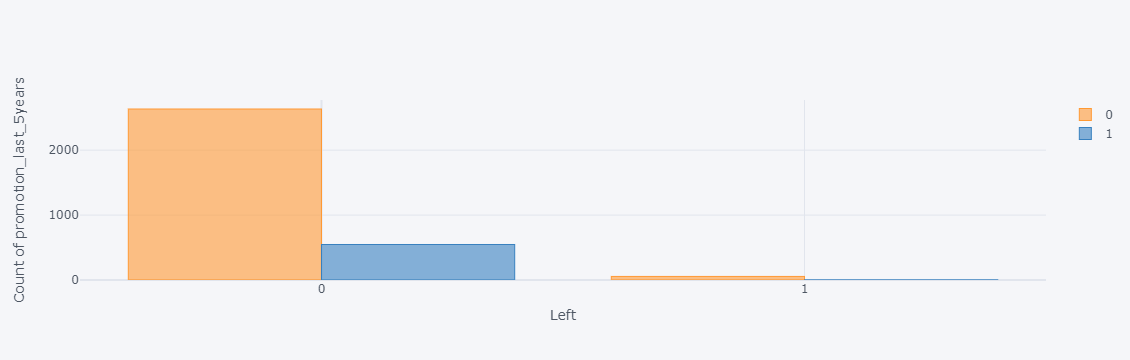

In [53]:
pd.crosstab(sales_dep.promotion_last_5years,sales_dep.left).iplot("bar",xTitle = "Left",yTitle = " Count of promotion_last_5years")

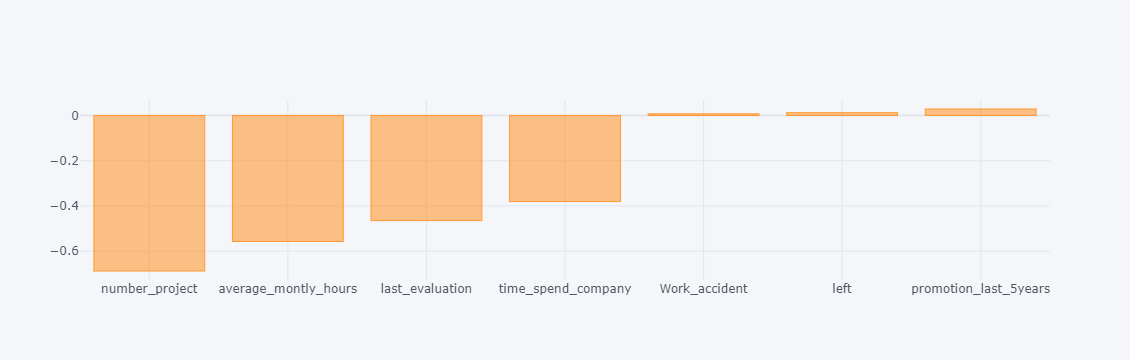

In [54]:
sales_dep[sales_dep.satisfaction_level < 0.5].corr()["satisfaction_level"].drop(index = "satisfaction_level").sort_values(ascending = True).iplot("bar")

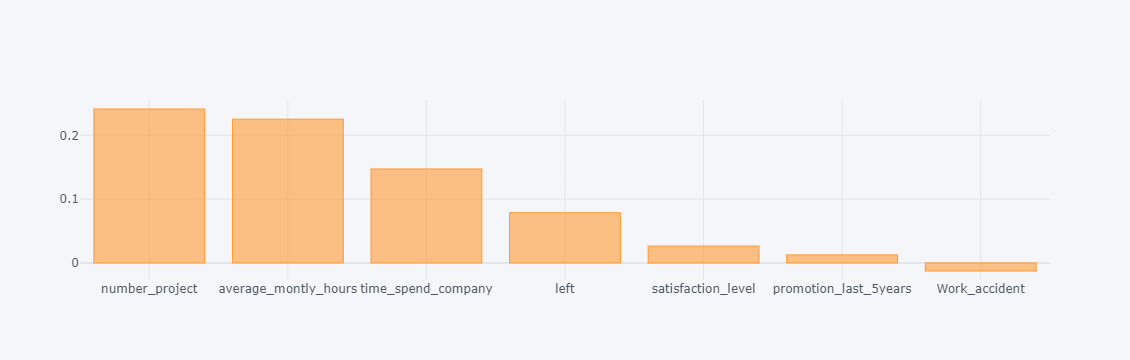

In [55]:
sales_dep[sales_dep.last_evaluation > 0.5].corr()["last_evaluation"].drop(index = "last_evaluation").sort_values(ascending = False).iplot("bar")

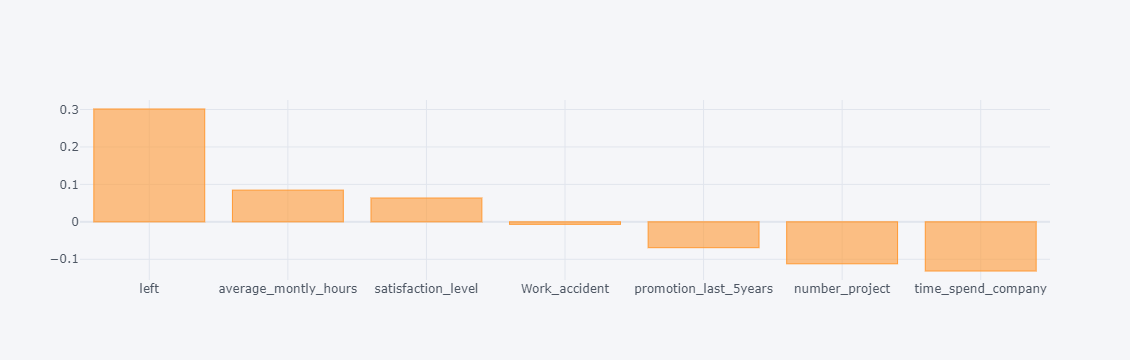

In [56]:
sales_dep[sales_dep.last_evaluation < 0.5].corr()["last_evaluation"].drop(index = "last_evaluation").sort_values(ascending = False).iplot("bar")

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [57]:
label_encoding = LabelEncoder()
df.salary = label_encoding.fit_transform(df["salary"])
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years Departments  salary  
0                          0       sales       1  
1                          0       sales       2  
2                          0       sales       2  
3                          0       sales       1  
4                          0       sales       1  
...                      ...         ...     ...  
11995                      1  management       0  
11996                      1  management       0  
11997                      1  management       0  
11998                      1   marketing       0  
11999                      0          IT       1  

[11991 rows x 10 columns]

In [58]:
df = pd.get_dummies(df,columns=["Departments"],drop_first=True)
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years  salary  Departments_RandD  \
0                          0       1                  0   
1                          0       2                  0   
2                          0       2                  0   
3                          0       1                  0   
4                          0       1                  0   
...                      ...     ...                ...   
11995                      1       0                  0   
11996                      1       0                  0   
11997                      1       0                  0   
11998                      1       0                  0   
11999                      0       1                  0   

       Departments_accounting  Departments_hr  Departments_management  \
0                           0               0                       0   
1                           0               0                       0   
2                           0               0                       0   
3                           0               0                       0   
4                           0               0                       0   
...                       ...             ...                     ...   
11995                       0               0                       1   
11996                       0               0                       1   
11997                       0               0                       1   
11998                       0               0                       0   
11999                       0               0                       0   

       Departments_marketing  Departments_product_mng  Departments_sales  \
0                          0                        0                  1   
1                          0                        0                  1   
2                          0                        0                  1   
3                          0                        0                  1   
4                          0                        0                  1   
...                      ...                      ...                ...   
11995                      0                        0                  0   
11996                      0                        0                  0   
11997                      0                        0                  0   
11998                      1                       

In [59]:
X = df.drop(columns="left")
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.31868132, 0.265625  , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.02197802, 0.8125    , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 0.        ,
        0.        ]])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [60]:
from pyclustertend import hopkins
hopkins(X,X.shape[0])

0.08586674374731841

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

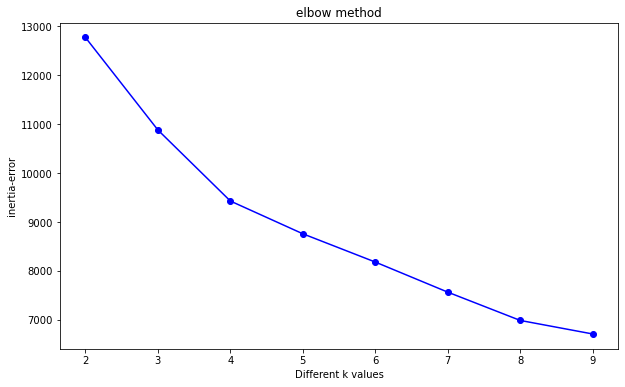

In [61]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
plt.plot(range(2,10), ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

<IPython.core.display.Javascript object>

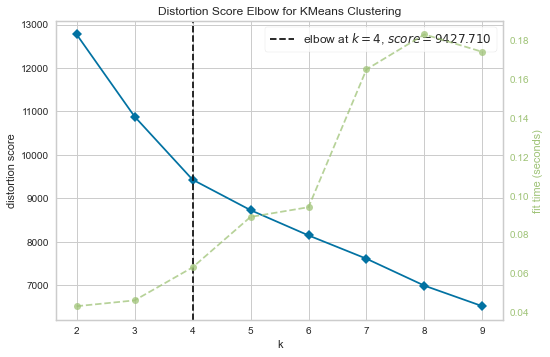

In [62]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
kelbow = KElbowVisualizer(kmeans, k = (2,10))
kelbow.fit(X)
kelbow.show();

In [63]:
from sklearn.metrics import silhouette_samples,silhouette_score
ssd =[]
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)
    print(f"For n_clusters {k} clusters, the silhouette score is {silhouette_score(X, model.labels_)}")

<IPython.core.display.Javascript object>

For n_clusters 2 clusters, the silhouette score is 0.18017580309104436


<IPython.core.display.Javascript object>

For n_clusters 3 clusters, the silhouette score is 0.24643292964532212


<IPython.core.display.Javascript object>

For n_clusters 4 clusters, the silhouette score is 0.295660467567761


<IPython.core.display.Javascript object>

For n_clusters 5 clusters, the silhouette score is 0.3158591866542446


<IPython.core.display.Javascript object>

For n_clusters 6 clusters, the silhouette score is 0.3362571904389998


<IPython.core.display.Javascript object>

For n_clusters 7 clusters, the silhouette score is 0.351119563329145


<IPython.core.display.Javascript object>

For n_clusters 8 clusters, the silhouette score is 0.34033672659783953


<IPython.core.display.Javascript object>

For n_clusters 9 clusters, the silhouette score is 0.3534417815601278


In [64]:
kmeans_model = KMeans(n_clusters = 4, random_state = 42)
kmeans_model.fit_predict(X)

data.drop_duplicates(inplace=True)
data['predicted_clusters'] = kmeans_model.labels_
data

<IPython.core.display.Javascript object>

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years Departments   salary  predicted_clusters  
0                          0        sales     low                   0  
1                          0        sales  medium                   0  
2                          0        sales  medium                   0  
3                          0        sales     low                   0  
4                          0        sales     low                   0  
...                      ...          ...     ...                 ...  
11995                      1   management    high                   2  
11996                      1   management    high                   2  
11997                      1   management    high                   2  
11998                      1    marketing    high                   2  
11999                      0           IT     low                   2  

[11991 rows x 11 columns]

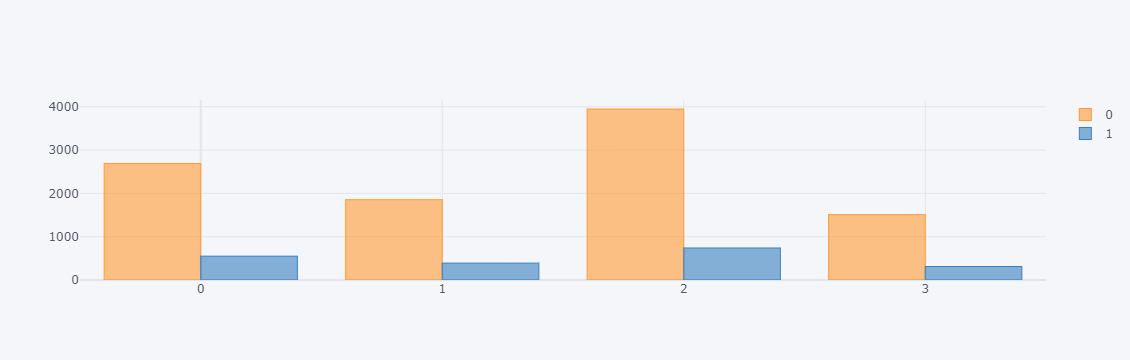

In [65]:
pd.crosstab(data.predicted_clusters,data.left).iplot("bar")

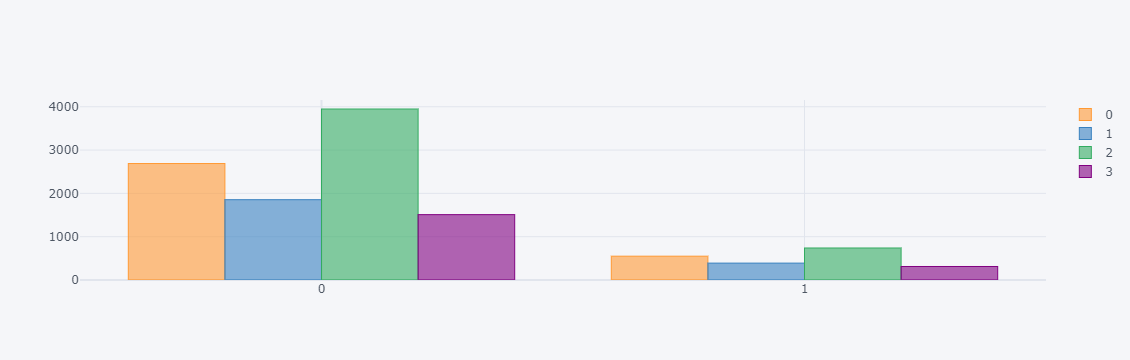

In [66]:
pd.crosstab(data['left'], data['predicted_clusters']).iplot("bar")

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [67]:
data.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [68]:
data.corr()["left"].drop(index="left").sort_values(ascending=False)

time_spend_company       0.173295
average_montly_hours     0.070409
number_project           0.030928
last_evaluation          0.013520
predicted_clusters      -0.006907
promotion_last_5years   -0.044657
Work_accident           -0.125436
satisfaction_level      -0.350558
Name: left, dtype: float64

In [69]:
data["satisfaction_cat"] = pd.qcut(data.satisfaction_level.rank(method = "first"),[0.,.25,.5,.75,1],labels=[1,2,3,4])

In [70]:
data["last_evaluation_cat"] = pd.qcut(data.last_evaluation.rank(method = "first"),[0.,.25,.5,.75,1],labels=[1,2,3,4])

In [71]:
data["Success"] = (data["average_montly_hours"] / data["average_montly_hours"].mean() ) * data["time_spend_company"]

In [72]:
data.drop(columns="predicted_clusters",inplace=True)
data

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years Departments   salary satisfaction_cat  \
0                          0        sales     low                1   
1                          0        sales  medium                3   
2                          0        sales  medium                1   
3                          0        sales     low                3   
4                          0        sales     low                1   
...                      ...          ...     ...              ...   
11995                      1   management    high                4   
11996                      1   management    high                3   
11997                      1   management    high                4   
11998                      1    marketing    high                1   
11999                      0           IT     low                2   

      last_evaluation_cat    Success  
0                       1   2.349437  
1                       3   7.841435  
2                       4   5.427151  
3                       4   5.561832  
4                       1   2.379367  
...                   ...        ...  
11995                   1  12.919412  
11996                   4  13.268585  
11997                   1   9.228151  
11998                   2   8.579687  
11999                   3   2.693623  

[11991 rows x 13 columns]

### #Gradient Boosting Classifier

#### Model Building

In [73]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years  salary  Departments_RandD  \
0                          0       1                  0   
1                          0       2                  0   
2                          0       2                  0   
3                          0       1                  0   
4                          0       1                  0   
...                      ...     ...                ...   
11995                      1       0                  0   
11996                      1       0                  0   
11997                      1       0                  0   
11998                      1       0                  0   
11999                      0       1                  0   

       Departments_accounting  Departments_hr  Departments_management  \
0                           0               0                       0   
1                           0               0                       0   
2                           0               0                       0   
3                           0               0                       0   
4                           0               0                       0   
...                       ...             ...                     ...   
11995                       0               0                       1   
11996                       0               0                       1   
11997                       0               0                       1   
11998                       0               0                       0   
11999                       0               0                       0   

       Departments_marketing  Departments_product_mng  Departments_sales  \
0                          0                        0                  1   
1                          0                        0                  1   
2                          0                        0                  1   
3                          0                        0                  1   
4                          0                        0                  1   
...                      ...                      ...                ...   
11995                      0                        0                  0   
11996                      0                        0                  0   
11997                      0                        0                  0   
11998                      1                       

In [74]:
df = pd.read_csv("HR_Dataset.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [75]:
data.sample(7)

satisfaction_level  last_evaluation  number_project  \
4513                 0.21             0.87               4   
911                  0.43             0.51               2   
1003                 0.43             0.48               2   
1219                 0.75             1.00               4   
7287                 0.13             0.72               3   
11209                0.38             0.43               3   
3287                 0.87             0.93               3   

       average_montly_hours  time_spend_company  Work_accident  left  \
4513                    148                   5              0     0   
911                     140                   3              0     1   
1003                    160                   3              0     1   
1219                    243                   5              0     1   
7287                    244                   4              0     0   
11209                   188                   7              0     0   
3287                    178                   3              0     0   

       promotion_last_5years Departments   salary satisfaction_cat  \
4513                       0        sales  medium                1   
911                        0        sales     low                1   
1003                       0        sales  medium                1   
1219                       0        RandD     low                3   
7287                       0    technical  medium                1   
11209                      0        sales  medium                1   
3287                       0   management     low                4   

      last_evaluation_cat   Success  
4513                    4  3.691261  
911                     1  2.095040  
1003                    1  2.394331  
1219                    4  6.060651  
7287                    3  4.868473  
11209                   1  6.564458  
3287                    4  2.663693

In [76]:
data.satisfaction_cat =  data.satisfaction_cat.astype("int")  ## sonradan yapıldı

In [77]:
data.last_evaluation_cat = data.last_evaluation_cat.astype("int") ## sonradan yapıldı

In [78]:
data["dissatisfaction"] = abs(df.last_evaluation - df.satisfaction_level) ## sonradan yapıldı

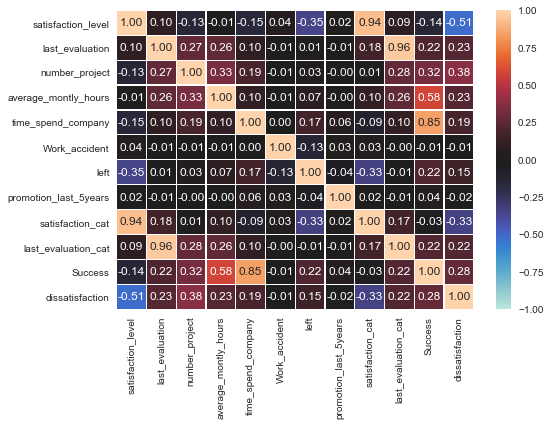

In [79]:
sns.heatmap(data.corr(),annot=True,vmax=1,center=0,vmin=-1,fmt= ".2f",linewidths= 0.2);

In [80]:
data.rename(columns={"Departments ":"Departments"},inplace=True)

In [81]:
df.rename(columns={"Departments ":"Departments"},inplace=True)

In [82]:
label_encoding = LabelEncoder()
df.salary = label_encoding.fit_transform(df["salary"])
data.salary = label_encoding.fit_transform(data.salary)

In [83]:
cat_list_default = ["Work_accident","promotion_last_5years","Departments","salary"]

In [84]:
num_col_default = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company"]

In [85]:
cat_list_data = ["Work_accident","promotion_last_5years","Departments","salary","satisfaction_cat","last_evaluation_cat"]

In [86]:
num_col_data = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Success","dissatisfaction"]

In [87]:
X_data = data.drop(columns = "left")
y_data = data["left"]
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size=0.30, random_state=42, stratify=y_data)

X_default = df.drop(columns = "left")
y_default = df.left
X_default_train, X_default_test, y_default_train, y_default_test = train_test_split(X_default, y_default, test_size=0.30, random_state=42, stratify=y_default)

In [88]:
scaler = MinMaxScaler()
ohe = OneHotEncoder(handle_unknown="ignore",drop="if_binary")

models = []
models.append(("data","XGB",XGBClassifier(random_state = 42)))
models.append(("default","XGB",XGBClassifier(random_state = 42)))
models.append(("data","LightGBM", LGBMClassifier(random_state = 42)))
models.append(("default","LightGBM", LGBMClassifier(random_state = 42)))
models.append(("data",'GBC', GradientBoostingClassifier(random_state = 42)))
models.append(("default",'GBC', GradientBoostingClassifier(random_state = 42)))
models.append(("data",'ADA', AdaBoostClassifier(random_state = 42)))
models.append(("default",'ADA', AdaBoostClassifier(random_state = 42)))
models.append(("data",'RF', RandomForestClassifier(random_state = 42)))
models.append(("default",'RF', RandomForestClassifier(random_state = 42)))
models.append(("data",'LR', LogisticRegression(random_state = 42)))
models.append(("default",'LR', LogisticRegression(random_state = 42)))
models.append(("data",'KNN', KNeighborsClassifier()))
models.append(("default",'KNN', KNeighborsClassifier()))
models.append(("data",'SVM', SVC(gamma='auto', random_state = 42)))
models.append(("default",'SVM', SVC(gamma='auto', random_state = 42)))

name_list_data = []
name_list_default= []
accuracy_scores_data = []
accuracy_scores_default = []
recall_scores_data = []
recall_scores_default = []


for def_dat,name,model in models:
    if def_dat == "data":
        ct = make_column_transformer((ohe,cat_list_data),
                                     (scaler,num_col_data),
                                    remainder="passthrough")
        pipe = make_pipeline(ct,model)
        pipe.fit(X_data_train,y_data_train)
        y_data_pred = pipe.predict(X_data_test)
        accuracy_scores_data.append(accuracy_score(y_data_test,y_data_pred))
        recall_scores_data.append(recall_score(y_data_test,y_data_pred))
        name_list_data.append(name)
        result_data = { "Type": "Data","Model":name_list_data,"Accuracy Scores":accuracy_scores_data,"Recall Score":recall_scores_data}    
    elif def_dat == "default":
        ct = make_column_transformer((ohe,cat_list_default),
                                     (scaler,num_col_default),
                                    remainder="passthrough")
        pipe = make_pipeline(ct,model)
        pipe.fit(X_default_train,y_default_train)
        y_default_pred = pipe.predict(X_default_test)
        accuracy_scores_default.append(accuracy_score(y_default_test,y_default_pred))
        recall_scores_default.append(recall_score(y_default_test,y_default_pred))
        name_list_default.append(name)        
        result = {"Type": "Default","Model":name_list_default,"Accuracy Scores":accuracy_scores_default,"Recall Score":recall_scores_default}
dataframe = pd.concat([pd.DataFrame(result),pd.DataFrame(result_data)],ignore_index=True).sort_values(by="Recall Score",ascending=False)
dataframe.reset_index(drop=True)

[15:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Type     Model  Accuracy Scores  Recall Score
0   Default       XGB         0.985778      0.962652
1   Default        RF         0.989556      0.962652
2   Default  LightGBM         0.985556      0.954248
3   Default       GBC         0.974889      0.936508
4      Data       XGB         0.983046      0.927973
5      Data  LightGBM         0.984158      0.927973
6      Data       GBC         0.981379      0.927973
7      Data        RF         0.984992      0.921273
8      Data       ADA         0.970261      0.919598
9   Default       ADA         0.955556      0.909430
10  Default       KNN         0.940889      0.886088
11     Data       KNN         0.944414      0.837521
12     Data        LR         0.896609      0.653266
13     Data       SVM         0.900778      0.649916
14  Default       SVM         0.858222      0.468721
15  Default        LR         0.792222      0.365079

In [89]:
cat_list_data = ["Work_accident","promotion_last_5years","Departments","salary","satisfaction_cat","last_evaluation_cat"]

In [90]:
num_col_data = ["number_project","average_montly_hours","time_spend_company","Success","dissatisfaction"]

In [91]:
X_data_deneme = data.drop(columns= ["satisfaction_level","last_evaluation","left"])
y_data_deneme = data["left"]
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data_deneme, y_data_deneme, test_size=0.30, random_state=42, stratify=y_data_deneme)

X_default_deneme = df.drop(columns = "left")
y_default_deneme = df.left
X_default_train, X_default_test, y_default_train, y_default_test = train_test_split(X_default_deneme, y_default_deneme, test_size=0.30, random_state=42, stratify=y_default_deneme)


scaler = MinMaxScaler()
ohe = OneHotEncoder(handle_unknown="ignore",drop="if_binary")

models = []
models.append(("data","XGB",XGBClassifier(random_state = 42)))
models.append(("default","XGB",XGBClassifier(random_state = 42)))
models.append(("data","LightGBM", LGBMClassifier(random_state = 42)))
models.append(("default","LightGBM", LGBMClassifier(random_state = 42)))
models.append(("data",'GBC', GradientBoostingClassifier(random_state = 42)))
models.append(("default",'GBC', GradientBoostingClassifier(random_state = 42)))
models.append(("data",'ADA', AdaBoostClassifier(random_state = 42)))
models.append(("default",'ADA', AdaBoostClassifier(random_state = 42)))
models.append(("data",'RF', RandomForestClassifier(random_state = 42)))
models.append(("default",'RF', RandomForestClassifier(random_state = 42)))
models.append(("data",'LR', LogisticRegression(random_state = 42)))
models.append(("default",'LR', LogisticRegression(random_state = 42)))
models.append(("data",'KNN', KNeighborsClassifier()))
models.append(("default",'KNN', KNeighborsClassifier()))
models.append(("data",'SVM', SVC(gamma='auto', random_state = 42)))
models.append(("default",'SVM', SVC(gamma='auto', random_state = 42)))

name_list_data = []
name_list_default= []
accuracy_scores_data = []
accuracy_scores_default = []
recall_scores_data = []
recall_scores_default = []


for def_dat,name,model in models:
    if def_dat == "data":
        ct = make_column_transformer((ohe,cat_list_data),
                                     (scaler,num_col_data),
                                    remainder="passthrough")
        pipe = make_pipeline(ct,model)
        pipe.fit(X_data_train,y_data_train)
        y_data_pred = pipe.predict(X_data_test)
        accuracy_scores_data.append(accuracy_score(y_data_test,y_data_pred))
        recall_scores_data.append(recall_score(y_data_test,y_data_pred))
        name_list_data.append(name)
        result_data = { "Type": "Data","Model":name_list_data,"Accuracy Scores":accuracy_scores_data,"Recall Score":recall_scores_data}    
    elif def_dat == "default":
        ct = make_column_transformer((ohe,cat_list_default),
                                     (scaler,num_col_default),
                                    remainder="passthrough")
        pipe = make_pipeline(ct,model)
        pipe.fit(X_default_train,y_default_train)
        y_default_pred = pipe.predict(X_default_test)
        accuracy_scores_default.append(accuracy_score(y_default_test,y_default_pred))
        recall_scores_default.append(recall_score(y_default_test,y_default_pred))
        name_list_default.append(name)        
        result = {"Type": "Default","Model":name_list_default,"Accuracy Scores":accuracy_scores_default,"Recall Score":recall_scores_default}
dataframe = pd.concat([pd.DataFrame(result),pd.DataFrame(result_data)],ignore_index=True).sort_values(by="Recall Score",ascending=False)
dataframe.reset_index(drop=True)

[15:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Type     Model  Accuracy Scores  Recall Score
0   Default       XGB         0.985778      0.962652
1   Default        RF         0.989556      0.962652
2   Default  LightGBM         0.985556      0.954248
3   Default       GBC         0.974889      0.936508
4      Data       GBC         0.978599      0.924623
5      Data       XGB         0.977487      0.916248
6      Data  LightGBM         0.979711      0.912898
7      Data        RF         0.981934      0.912898
8   Default       ADA         0.955556      0.909430
9   Default       KNN         0.940889      0.886088
10     Data       ADA         0.952752      0.845896
11     Data       KNN         0.943580      0.832496
12     Data       SVM         0.899666      0.644891
13     Data        LR         0.883268      0.591290
14  Default       SVM         0.858222      0.468721
15  Default        LR         0.792222      0.365079

[15:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------Test Scores---------------------
[[3404   25]
 [  39 1032]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.98      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

---------------------Train Scores---------------------
[[7994    5]
 [  21 2479]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.99      0.99      2500

    accuracy                        

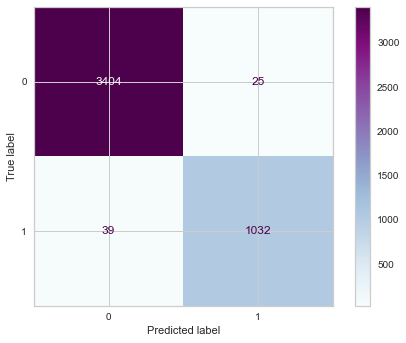

In [92]:
df_dummies = pd.get_dummies(df)
X = df_dummies.drop('left', axis=1)
y = df_dummies['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

xgbc_model = XGBClassifier(random_state=42)
xgbc_model.fit(X_train, y_train)
y_pred = xgbc_model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = xgbc_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(xgbc_model, X_test, y_test,cmap="BuPu",);

In [93]:
param_grid = {"n_estimators":[100,500],
              "subsample":[0.5, 1], 
              "max_features" : [None, 6, 4],
              "learning_rate": [0.01, 0.1, 0.2], 
              'max_depth':[ 4, 5, 6]}
x_grid = GridSearchCV(xgbc_model, param_grid, scoring = "recall", verbose=2, n_jobs = -1)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[15:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------Test Scores---------------------
[[3405   24]
 [  40 1031]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.98      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

---------------------Train Scores---------------------
[[7999    0]
 [   0 2500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00     

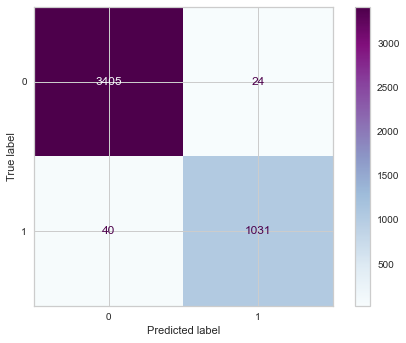

In [94]:
y_pred = x_grid.fit(X_train, y_train).predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = x_grid.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(x_grid, X_test, y_test,cmap="BuPu");

In [95]:
x_grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'max_features': None,
 'n_estimators': 500,
 'subsample': 1}

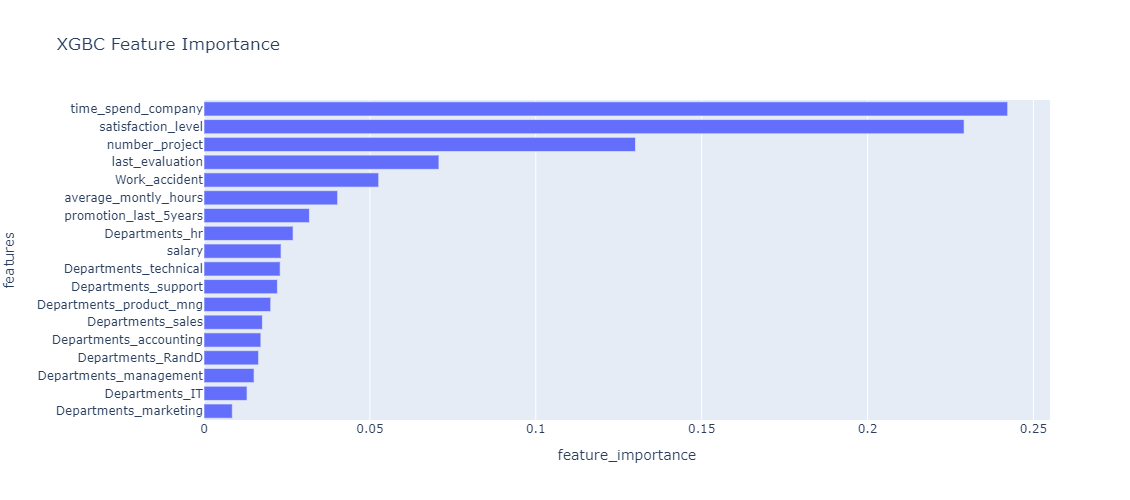

In [96]:
feature_importance = np.array(x_grid.best_estimator_.feature_importances_)
features = X_train.columns
fi={'features':features,'feature_importance':feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['feature_importance'], ascending=True,inplace=True)
fig = px.bar(df_fi, x='feature_importance', y='features',title="XGBC Feature Importance",height=500)
fig.show()

In [97]:
last_df = df_dummies.loc[:,["time_spend_company","satisfaction_level","number_project","last_evaluation"]]
last_df["left"] = df.left
last_df

time_spend_company  satisfaction_level  number_project  \
0                       3                0.38               2   
1                       6                0.80               5   
2                       4                0.11               7   
3                       5                0.72               5   
4                       3                0.37               2   
...                   ...                 ...             ...   
14994                   3                0.40               2   
14995                   3                0.37               2   
14996                   3                0.37               2   
14997                   4                0.11               6   
14998                   3                0.37               2   

       last_evaluation  left  
0                 0.53     1  
1                 0.86     1  
2                 0.88     1  
3                 0.87     1  
4                 0.52     1  
...                ...   ...  
14994             0.57     1  
14995             0.48     1  
14996             0.53     1  
14997             0.96     1  
14998             0.52     1  

[14999 rows x 5 columns]

In [98]:
X = last_df.drop('left', axis=1)
y = last_df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

last_model = XGBClassifier(random_state=42)

last_model.fit(X_train, y_train)
y_pred = last_model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = last_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[15:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------Test Scores---------------------
[[3397   32]
 [  56 1015]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3429
           1       0.97      0.95      0.96      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500

---------------------Train Scores---------------------
[[7970   29]
 [  66 2434]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.97      0.98      2500

    accuracy                        

In [99]:
param_grid = {'learning_rate': [0.2,0.01],
             'max_depth' : [5,6],
             'max_features' : [None,2],
             'n_estimators' : [500,100],
             'subsample' : [1,2]}
latest_model = GridSearchCV(last_model, param_grid, scoring = "recall", verbose=2, n_jobs = -1,cv = 5)

In [100]:
y_pred = latest_model.fit(X_train, y_train).predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = latest_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[15:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------Test Scores---------------------
[[3393   36]
 [  40 1031]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.97      0.96      0.96      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500

---------------------Train Scores---------------------
[[7983   16]
 [   9 2491]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       0.99      

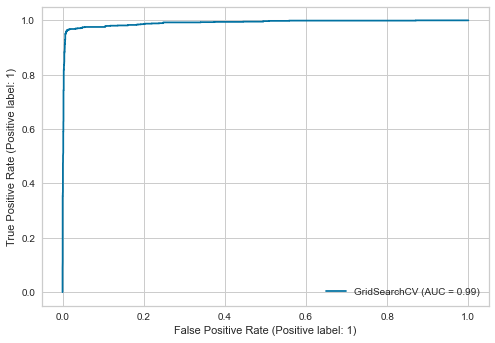

In [101]:
plot_roc_curve(latest_model, X_test, y_test);

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [102]:
latest_model

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
         

In [106]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)

[15:25:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
latest_model.fit(X,y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[15:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
         

In [109]:
import pickle
pickle.dump(latest_model, open("model.pkl", "wb"))

### Save and Export Variables as .pkl

In [110]:
pickle.dump(final_scaler, open('scaler.pkl', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___